In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/Users/nandrajog/Downloads/titanic.csv',low_memory=False)
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:

# divide dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

### Age

Text(0, 0.5, 'Age of Passengers')

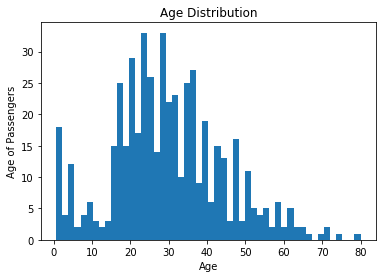

In [4]:
X_train['Age'].plot(kind='hist',bins=50)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Age of Passengers')

Text(0, 0.5, 'Age of Passengers')

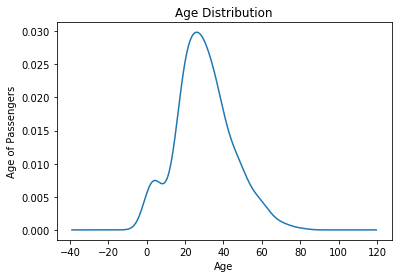

In [6]:
X_train['Age'].plot(kind='kde')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Age of Passengers')

Text(0, 0.5, 'Number of Passengers')

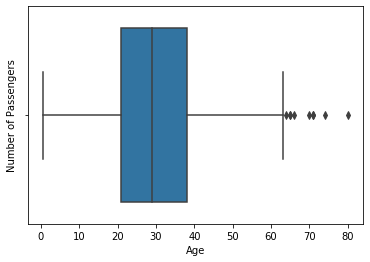

In [9]:
# now let's plot the boxplots and whiskers

fig = sns.boxplot(X_train.Age)
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

In [41]:
pd.DataFrame(X_train.Age.describe())

,Age
count,502.000000
mean,29.915339
std,14.506994
min,0.670000
25%,21.000000
50%,29.000000
75%,38.000000
max,80.000000


In [46]:
pd.DataFrame(X_train.groupby(['Age'])['Survived'].value_counts()).tail(6)

,,Survived
Age,Survived,
65.0,0,2
66.0,0,1
70.0,0,1
71.0,0,2
74.0,0,1
80.0,1,1


In [48]:
X_train.groupby(['Age'])['Survived'] 

False

In [51]:
X_train[X_train.Survived ==0]['Age']


386     1.0
124    54.0
578     NaN
118    24.0
12     20.0
       ... 
70     32.0
277     NaN
723    50.0
629     NaN
684    60.0
Name: Age, Length: 381, dtype: float64

In [52]:
# and let's get the numbers to calculate the upper boundary
X_train.Age.describe()

count    502.000000
mean      29.915339
std       14.506994
min        0.670000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [54]:
X_train.Age.mean()

29.915338645418327

In [55]:
X_train.Age.std()

14.506993804588454

In [60]:
# Assuming normality
#HERE we are using Gaussian approach
Upper_boundary = X_train.Age.mean() + 3* X_train.Age.std()
Upper_boundary

73.43632005918369

In [61]:
X_train.loc[X_train.Age>73, 'Age'] = 73
X_test.loc[X_test.Age>73, 'Age'] = 73

X_train.Age.max(), X_test.Age.max()

/anaconda3/envs/C-vision/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(73.0, 70.5)